In [1]:
# importing libraries

import numpy as np
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

Populating the interactive namespace from numpy and matplotlib


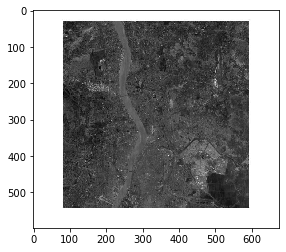

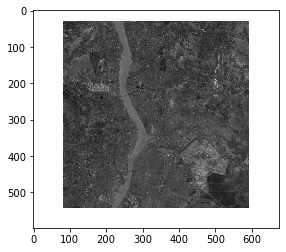

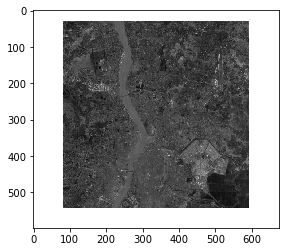

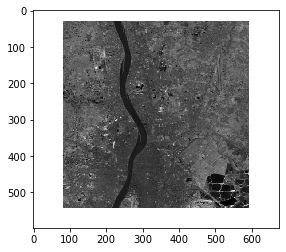

In [2]:
# displaying the input images

img=mpimg.imread('1.jpg') # R
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('2.jpg') # G
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('3.jpg') # B
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('4.jpg') # I
imgplot = plt.imshow(img)
plt.show()

In [5]:
#loading images for R, G, B and I

im1 = Image.open('1.jpg')
im2 = Image.open('2.jpg')
im3 = Image.open('3.jpg')
im4 = Image.open('4.jpg')

pix1 = im1.load()
pix2 = im2.load()
pix3 = im3.load()
pix4 = im4.load()

In [6]:
# creating feature vector from 4 images

feature_vec = []

for i in range(83, 595) : # 512 rows
    for j in range(30, 542) : # 512 cols
        
        feature_vec_row = []
        
        feature_vec_row.append(pix1[i, j][0])
        feature_vec_row.append(pix2[i, j][0])
        feature_vec_row.append(pix3[i, j][0])
        feature_vec_row.append(pix4[i, j][0])
        
        feature_vec.append(feature_vec_row)
        
feature_vec = np.array(feature_vec)
print(feature_vec)
feature_vec.shape

[[ 73  78  77 108]
 [ 77  84  82 122]
 [ 78  79  69 111]
 ...
 [255 255 255 255]
 [255 255 255 255]
 [228 227 239 237]]


(262144, 4)

In [7]:
# mean of columns in feature vector

mean = np.mean(feature_vec, axis = 0)
mean

array([67.15812683, 71.31724167, 67.04650497, 79.61330032])

In [8]:
# deviation from mean matrix

dev_mat = feature_vec - mean
print(dev_mat.shape)

# transpose of deviation matrix

dev_mat_T = np.transpose(dev_mat)
print(dev_mat_T.shape)

(262144, 4)
(4, 262144)


In [9]:
# calculating covariance matrix

cov_mat = np.dot(dev_mat_T, dev_mat) / 262144.0
print(cov_mat)

[[504.33096057 416.76361732 431.3597766  122.47733488]
 [416.76361732 410.2218713  404.30558589 160.82630961]
 [431.3597766  404.30558589 508.21863578 145.87713339]
 [122.47733488 160.82630961 145.87713339 670.51164576]]


In [10]:
# eigenvectors and eigenvalues

eigen_val, eigen_vec = np.linalg.eig(cov_mat)

print(eigen_val)
print(eigen_vec)

eigen_vec1 = eigen_vec[:, 0]
eigen_vec2 = eigen_vec[:, 1]
eigen_vec3 = eigen_vec[:, 2]
eigen_vec4 = eigen_vec[:, 3]


# getting eigenvectors
eigen_vec1 = np.resize(eigen_vec1, (4, 1))
eigen_vec2 = np.resize(eigen_vec2, (4, 1))
eigen_vec3 = np.resize(eigen_vec3, (4, 1))
eigen_vec4 = np.resize(eigen_vec4, (4, 1))

print(eigen_vec1)
print(eigen_vec2)
print(eigen_vec3)
print(eigen_vec4)

[1395.57017911  588.83933778   76.49759434   32.37600218]
[[ 0.55853844  0.23482448  0.60221068 -0.51984092]
 [ 0.51904139  0.12821887  0.18113632  0.8254366 ]
 [ 0.56100149  0.19031695 -0.77731541 -0.21174875]
 [ 0.32234791 -0.94456172  0.01768292 -0.05985231]]
[[0.55853844]
 [0.51904139]
 [0.56100149]
 [0.32234791]]
[[ 0.23482448]
 [ 0.12821887]
 [ 0.19031695]
 [-0.94456172]]
[[ 0.60221068]
 [ 0.18113632]
 [-0.77731541]
 [ 0.01768292]]
[[-0.51984092]
 [ 0.8254366 ]
 [-0.21174875]
 [-0.05985231]]


In [11]:
# checking correctness of eigenvectors
# sum of eigen values should be equal to sum of diagonal elements of covariance matrix

sum_eigen_values = sum(eigen_val)

sum_diagonal_cov = 0.0
for i in range(4):
    sum_diagonal_cov = sum_diagonal_cov + cov_mat[i][i]
    
print(sum_diagonal_cov)
print(sum_eigen_values)

2093.2831134134267
2093.283113413426


In [12]:
# can either create a complete new fecature matrix of size (262144 x 4) or 4 fetaure vectros of size (262144 x 1)

# final feature matrix of size (262144 x 4)
final_feature_vector = np.dot(feature_vec, np.transpose(eigen_vec))

# final feature vectors of size (262144 x 1)
final_feature_vector1 = np.dot(feature_vec, eigen_vec1)
final_feature_vector2 = np.dot(feature_vec, eigen_vec2)
final_feature_vector3 = np.dot(feature_vec, eigen_vec3)
final_feature_vector4 = np.dot(feature_vec, eigen_vec4)

len(final_feature_vector)

262144

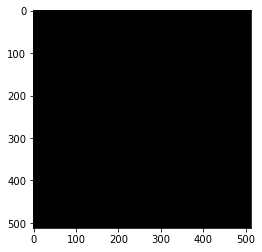

In [13]:
# creating blank images for final output

pc1 = Image.new('RGB', (512, 512))
pc1.save('blank1.png')
pix_pc1 = pc1.load()

pc2 = Image.new('RGB', (512, 512))
pc2.save('blank2.png')
pix_pc2 = pc2.load()

pc3 = Image.new('RGB', (512, 512))
pc3.save('blank3.png')
pix_pc3 = pc3.load()

pc4 = Image.new('RGB', (512, 512))
pc4.save('blank4.png')
pix_pc4 = pc4.load()

# printing one blank image for demo
plt.imshow(pc1)

In [14]:
# creating final images of size (512 x 512)
# reading values from final feature matrix for R, G, B and I

k = 0

for i in range(512) :
    for j in range(512) :
        
        rpix = 255 - int(final_feature_vector[k][0])
        gpix = 255 - int(final_feature_vector[k][1])
        bpix = 255 - int(final_feature_vector[k][2])
        ipix = 255 - int(final_feature_vector[k][3])
        
        pix_pc1[i,j] = (rpix, rpix, rpix, rpix)
        pix_pc2[i,j] = (gpix, gpix, gpix, gpix)
        pix_pc3[i,j] = (bpix, bpix, bpix, bpix)
        pix_pc4[i,j] = (ipix, ipix, ipix, ipix)
        
        k = k + 1

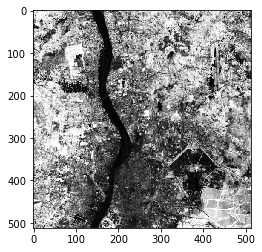

In [15]:
# image corresponding to highest value of eigenvalue

final_file = 'pca_output1.png'
pc1.save(final_file)

img = cv2.imread(final_file,0)
equ = cv2.equalizeHist(img)
cv2.imwrite(final_file, equ)

img = cv2.imread(final_file)
plt.imshow(img)

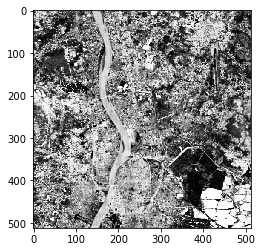

In [18]:
# image corresponding to second highest value of eigenvalue

final_file = 'pca_output2.png'
pc2.save(final_file)

img = cv2.imread(final_file,0)
equ = cv2.equalizeHist(img)
cv2.imwrite(final_file, equ)

img = cv2.imread(final_file)
plt.imshow(img)
plt.show()

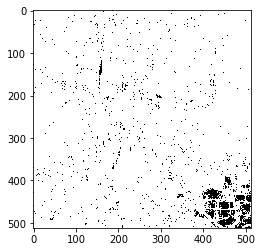

In [17]:
# image corresponding to second smallest value of eigenvalue

final_file = 'pca_output3.png'
pc3.save(final_file)

img = cv2.imread(final_file,0)
equ = cv2.equalizeHist(img)
cv2.imwrite(final_file, equ)

img = cv2.imread(final_file)
plt.imshow(img)
plt.show()

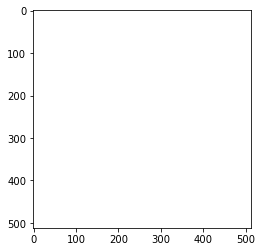

In [16]:
# image corresponding to smallest value of eigenvalue

final_file = 'pca_output4.png'
pc4.save(final_file)

img = cv2.imread(final_file,0)
equ = cv2.equalizeHist(img)
cv2.imwrite(final_file, equ)

img = cv2.imread(final_file)
plt.imshow(img)